In [39]:
import pandas as pd
import os.path as osp
from glob import glob
from rdkit import Chem
from rdkit.Chem import Draw
from copy import deepcopy
from PIL import Image
import io

from rdkit import DataStructs
import argparse


def generalize(core):
    query_params = Chem.AdjustQueryParameters()
    query_params.makeBondsGeneric = True
    query_params.aromatizeIfPossible = False
    query_params.adjustDegree = False
    query_params.adjustHeavyDegree = False
    generic_core = Chem.AdjustQueryProperties(core,query_params)
    return generic_core

def read_sdf(sdf_file, sanitize=False):
    supp = Chem.SDMolSupplier(sdf_file, sanitize=sanitize)
    mols_list = [i for i in supp]
    return mols_list

def write_sdf(mol_list,file, voice=False):
    writer = Chem.SDWriter(file)
    mol_cnt = 0
    for i in mol_list:
        try:
            writer.write(i)
            mol_cnt+=1
        except:
            pass
    writer.close()
    if voice: 
        print('Write {} molecules to {}'.format(mol_cnt,file))
        
def find_match(target,query_mols):
    for query_mol in query_mols:
        query = generalize(query_mol)
        match = target.GetSubstructMatch(query)
        if len(match) > 0:
            return match
    return ()

def save_img(ipy_Image, out_file):
    img_byte_arr = io.BytesIO(ipy_Image.data)
    img_pil = Image.open(img_byte_arr)
    png_file = searched_file.replace('.sdf','.png')
    img_pil.save(out_file)
    print('saved at {}'.format(out_file))

In [8]:
ori_mol = read_sdf('../frag2.sdf')[0]
ori_mol.RemoveAllConformers()

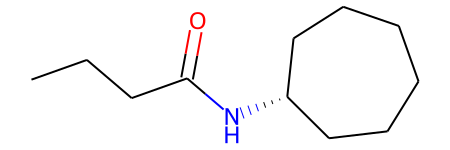

In [9]:
ori_mol

In [47]:
searched_file = './sim_searched.sdf'
searched_mols = read_sdf(searched_file)

In [50]:
searched_mols[0].GetProp('Similarity score')

'0.84'

In [ ]:

highlight_list = [find_match(mol, [ori_mol]) for mol in searched_mols] 
group_size = 8
show_mols_group = [searched_mols[i:i + group_size] for i in range(0, len(searched_mols), group_size)]
highlight_list_group = [highlight_list[i:i + group_size] for i in range(0, len(highlight_list), group_size)]
imgs = []
for show_mols, highlights in zip(show_mols_group, highlight_list_group):
    imgs.append(Draw.MolsToGridImage(show_mols, molsPerRow=4, subImgSize=(500,500), highlightAtomLists=highlights,maxMols=group_size))
png_file = searched_file.replace('.sdf','.png')
save_img(imgs[0], png_file)

In [ ]:
sims = [mol.GetProp('Similarity score') for mol in searched_mols]
ID = [mol.GetProp('IDNUMBER') for mol in searched_mols]
highlight_list = [find_match(mol, [ori_mol]) for mol in searched_mols] 
legends = [f'Sim: {i[0]}; ID: {i[1]};' for i in zip(sims, ID)]
group_size = 8
show_mols_group = [searched_mols[i:i + group_size] for i in range(0, len(searched_mols), group_size)]
highlight_list_group = [highlight_list[i:i + group_size] for i in range(0, len(highlight_list), group_size)]
legends_group = [legends[i:i + group_size] for i in range(0, len(legends), group_size)]
imgs = []
for show_mols, legend, highlights in zip(show_mols_group, legends_group, highlight_list_group):
    imgs.append(Draw.MolsToGridImage(show_mols, molsPerRow=4, subImgSize=(500,500), legends=legend, highlightAtomLists=highlights,maxMols=group_size))

png_file = searched_file.replace('.sdf','.png')
save_img(imgs[0], png_file)